**Loading the Package**

In [2]:
library(dplyr)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ b

**Read .csv file from webset and tidy it**

In [14]:
algerian_fire_0 <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"), skip = 1)
algerian_fire <- algerian_fire_0 %>% #set up right labels 
     select(day, month, year, Classes,Temperature, RH, Ws, Rain) %>%
    mutate(Temperature = as.numeric(Temperature)) %>%
    mutate(RH = as.numeric(RH)) %>%
    mutate(Ws = as.numeric(Ws)) %>%
    mutate(Rain = as.numeric(Rain)) 
algerian_fire$date <- as.Date(with(algerian_fire, paste(year, month, day, sep="-")), "%Y-%m-%d") #combine three columns and set it as date
tidy_al <- algerian_fire %>% select(date, Classes,Temperature, RH, Ws, Rain) #tidy data for the whole dataset

Warning message:
“Problem with `mutate()` input `Temperature`.
ℹ NAs introduced by coercion
ℹ Input `Temperature` is `as.numeric(Temperature)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `RH`.
ℹ NAs introduced by coercion
ℹ Input `RH` is `as.numeric(RH)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Ws`.
ℹ NAs introduced by coercion
ℹ Input `Ws` is `as.numeric(Ws)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Rain`.
ℹ NAs introduced by coercion
ℹ Input `Rain` is `as.numeric(Rain)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


**Creating training dataset and also a table for Mean of predictors**

In [15]:
bejaia_fire <- tidy_al[c(1:122),] #select data for bejaia region
bejaia_fire$Classes <- trimws(bejaia_fire$Classes) #remove space before and after the string
bejaia_fire <- bejaia_fire %>% mutate(Classes = as.factor(Classes)) #set the label back to factor
bejaia_split <- initial_split(bejaia_fire, prop = 0.8, strata = Classes)
bejaia_train <- training(bejaia_split) #split and get training dataset
mean_of_variable <- bejaia_train %>% 
    select(Temperature, RH, Ws, Rain) %>%
    map_df(mean, na.rm=FALSE)
mean_of_variable

Temperature,RH,Ws,Rain
<dbl>,<dbl>,<dbl>,<dbl>
31.44444,67.27273,15.92929,0.7040404


**Creating table for total number of observations, and observations for each classes**

In [16]:
tibble("Number of obervations"=c(nrow(bejaia_train),"Fire" ,"Not Fire"),
       "Fire"=summary(with(bejaia_train, Classes =="fire")) ) #create table for number of observations for each classes


Number of obervations,Fire
<chr>,<table>
99,logical
Fire,51
Not Fire,48


**Baking the training data for better visualization**

In [17]:
bejaia_recipe <- recipe(Classes~Temperature+RH+Ws+Rain, data=bejaia_train) %>% #scale the data
    step_center(all_predictors()) %>%
    step_scale(all_predictors())
bejaia_scaled <- bejaia_recipe %>%  
    prep() %>%
    bake(bejaia_train)

**Visualization**

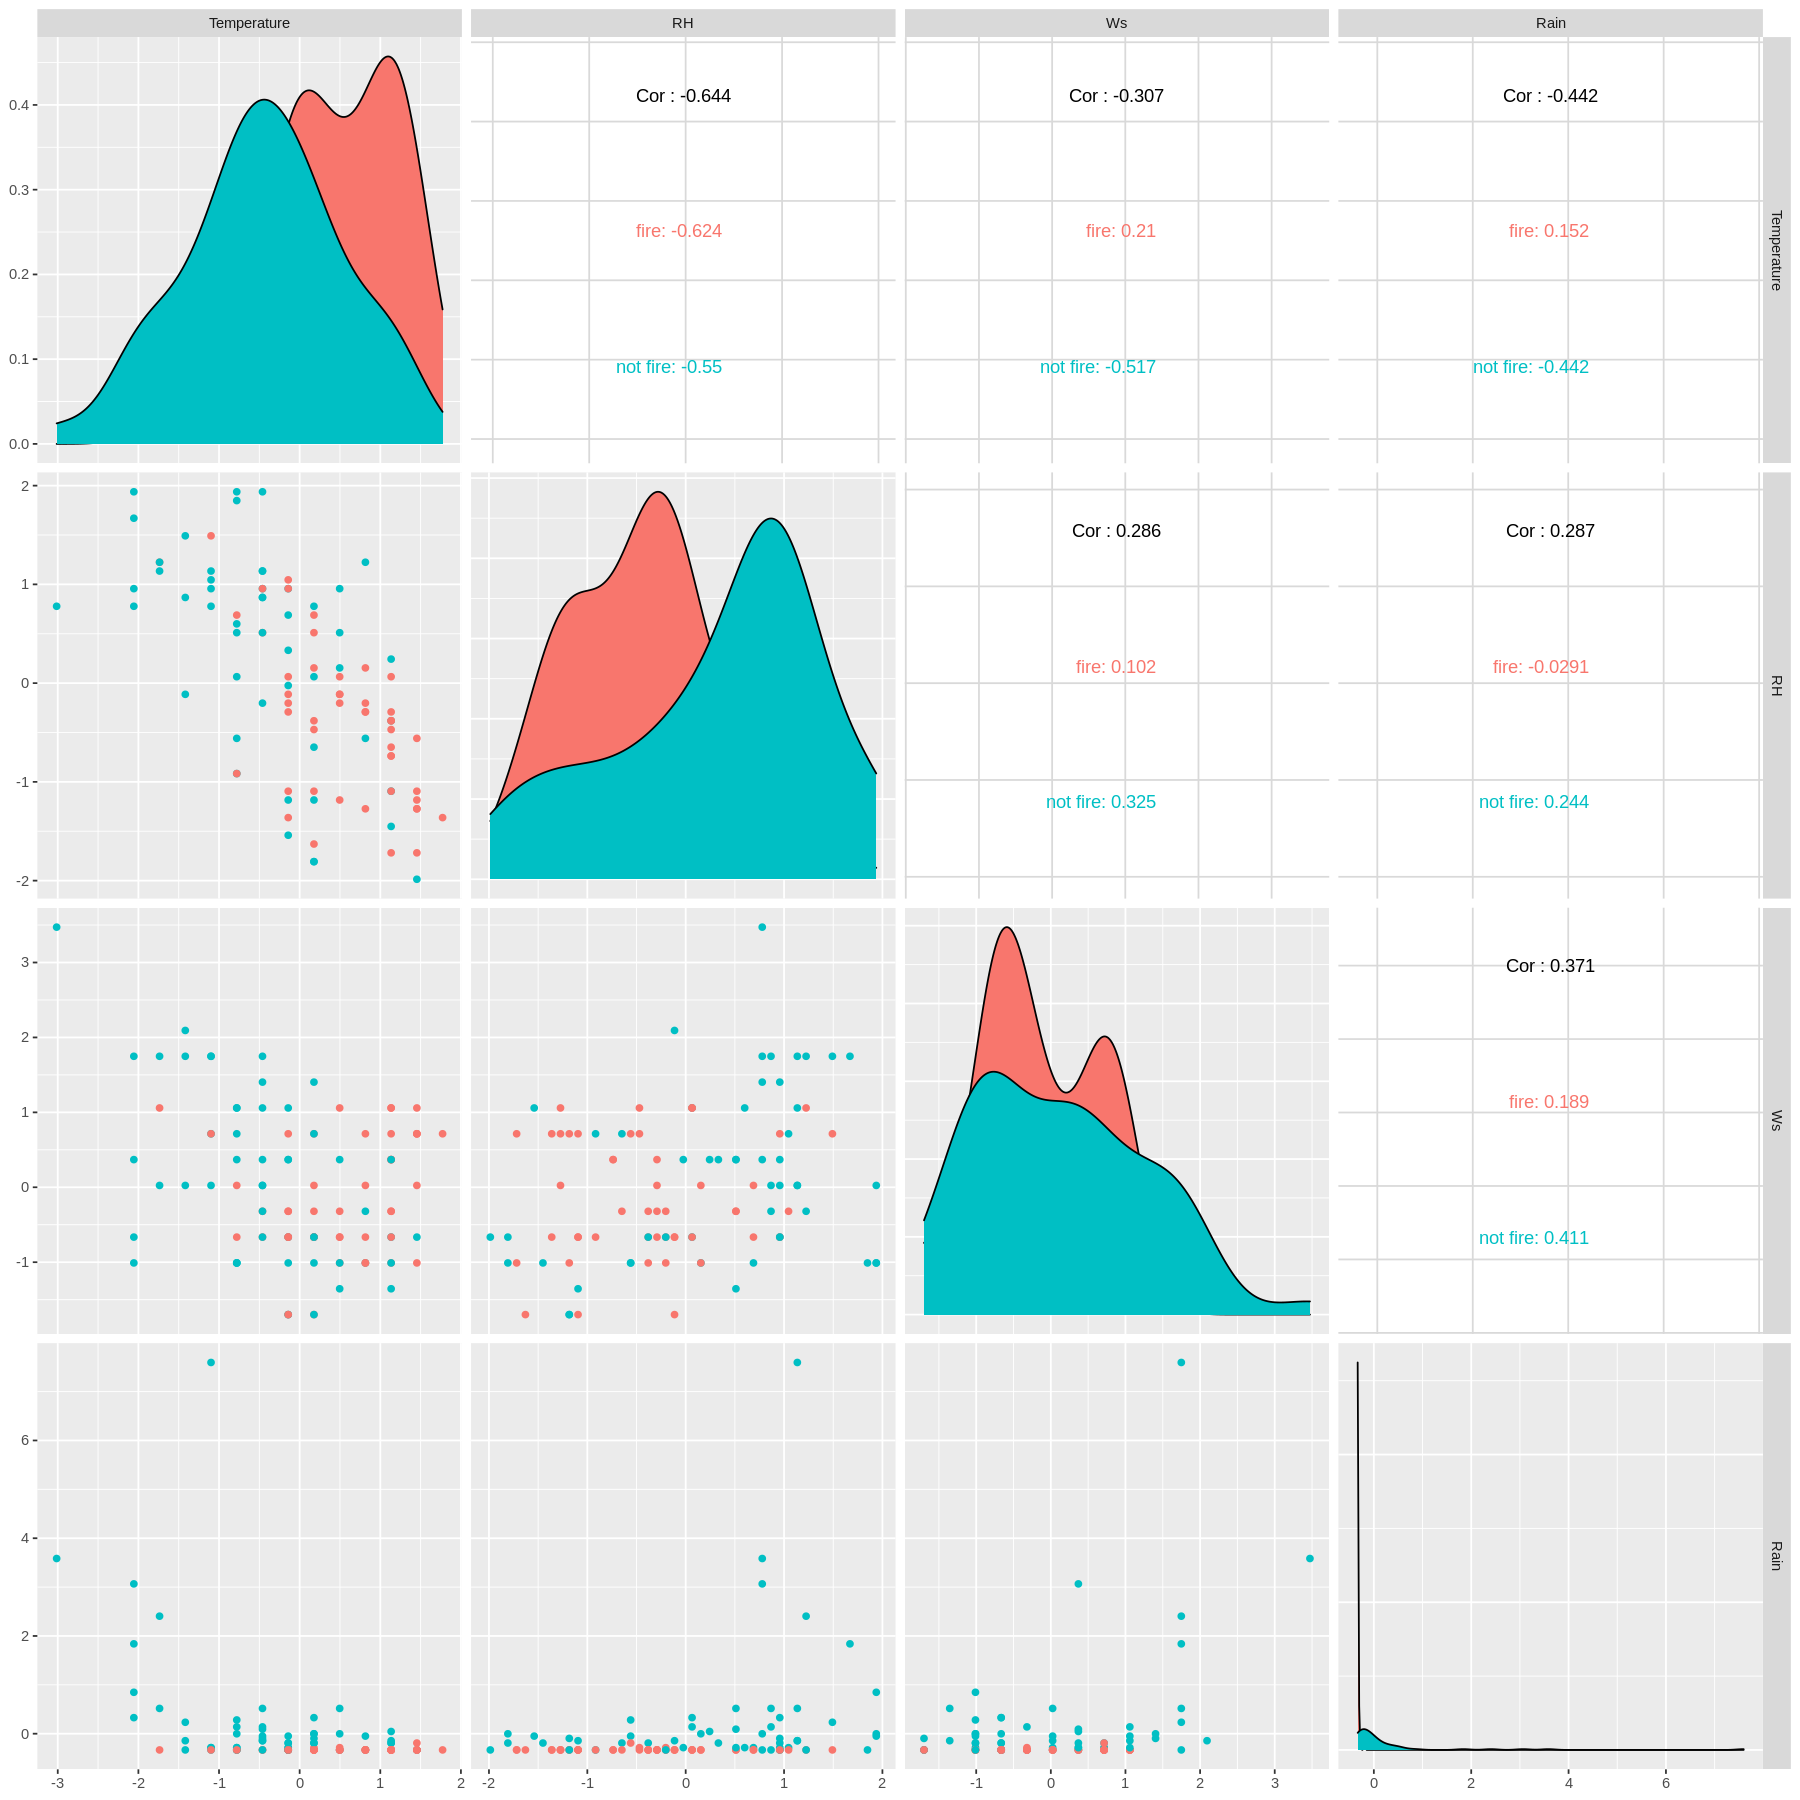

In [22]:
#not sure if this is a good visulization
options(repr.plot.width = 15, repr.plot.height = 15)
pairs_bejaia <- bejaia_scaled %>%
  select(Temperature, RH, Ws, Rain) %>%
  ggpairs(ggplot2::aes(colour=bejaia_train$Classes)) 
pairs_bejaia